In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [131]:
df = pd.read_csv("titanic.csv")
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3 Провести первичный анилиз

In [132]:
df.info()

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64

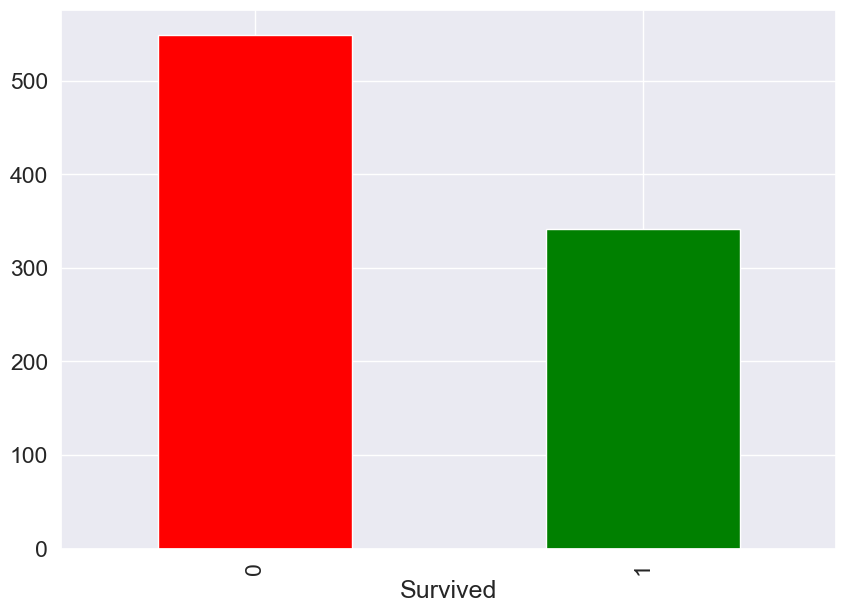

In [133]:
df['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
df['Survived'].value_counts()

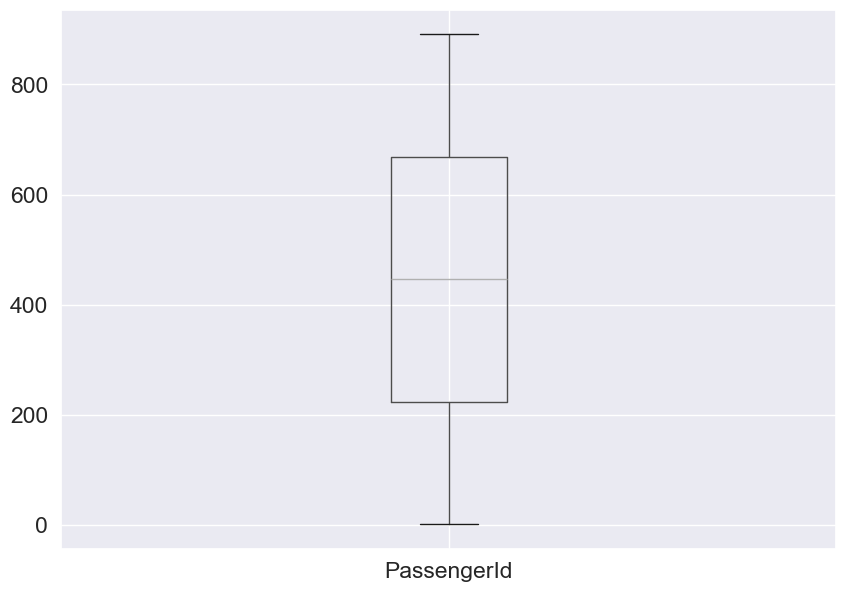

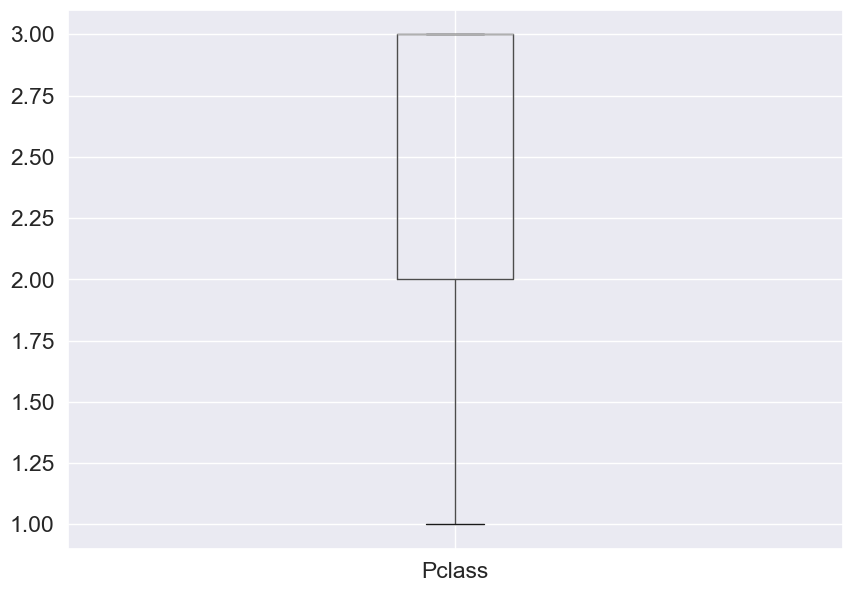

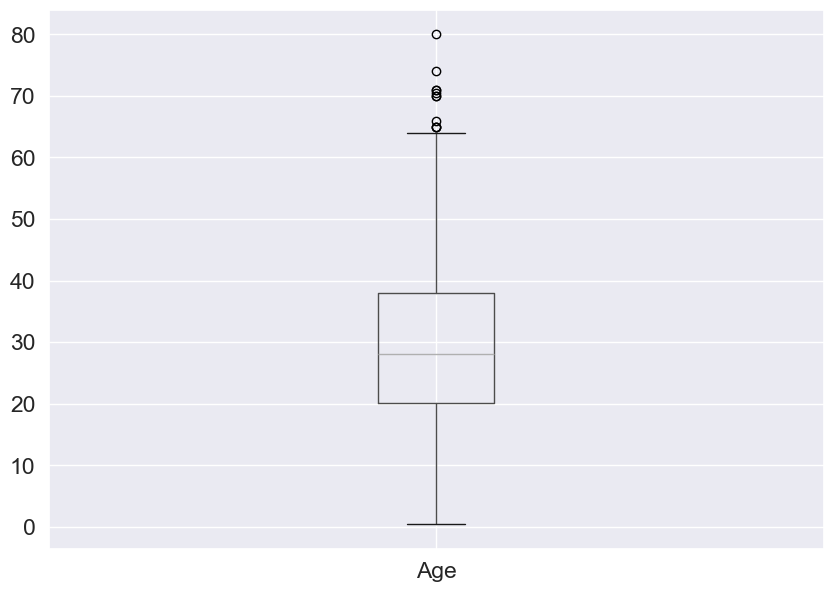

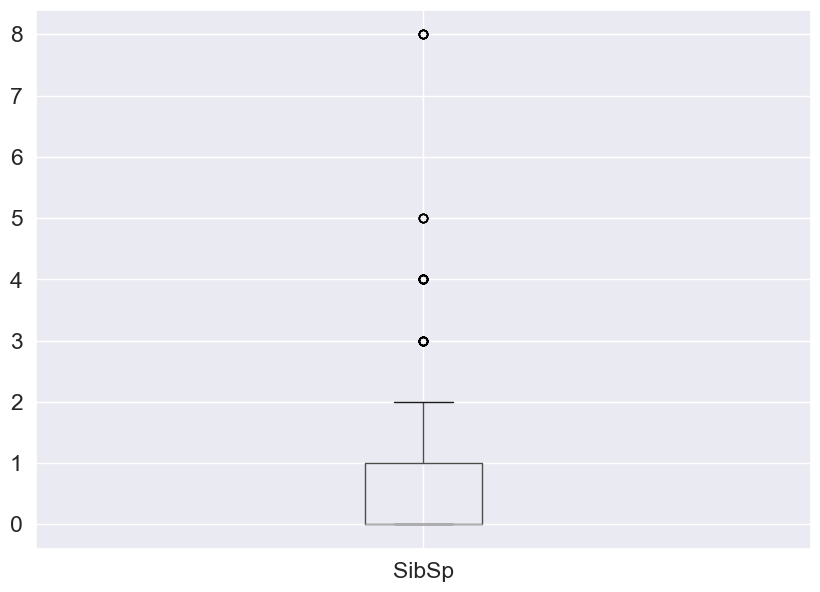

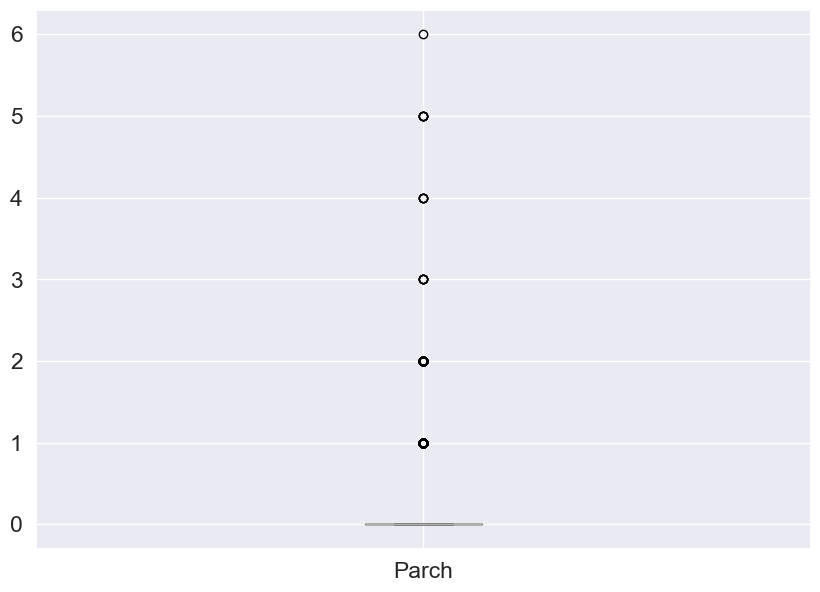

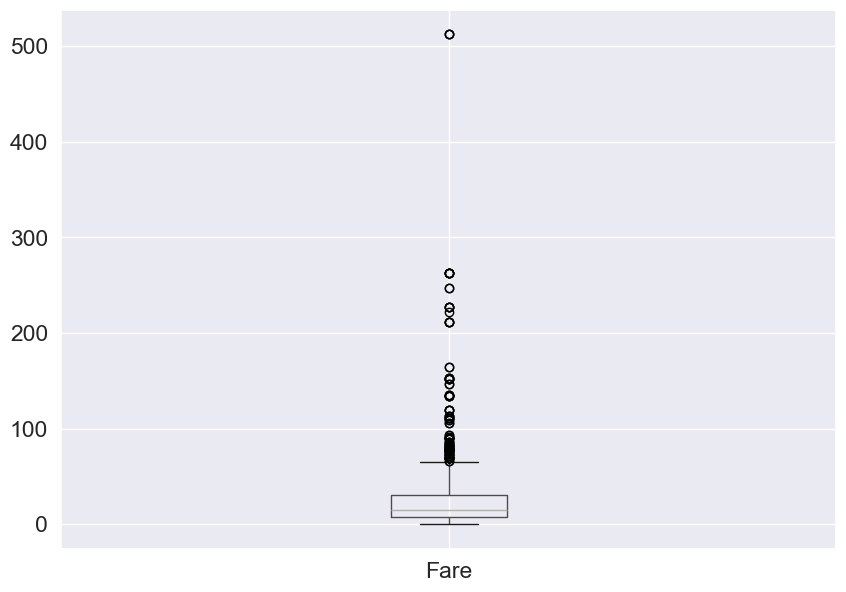

In [134]:
Y = df['Survived']
X = df.drop('Survived', axis=1).copy()

numeric_cols = X.select_dtypes(include='number').columns.to_list()
categorical_cols = X.select_dtypes(include='object').columns.to_list()

for col in numeric_cols:
    X.boxplot(column=col)
    plt.show()

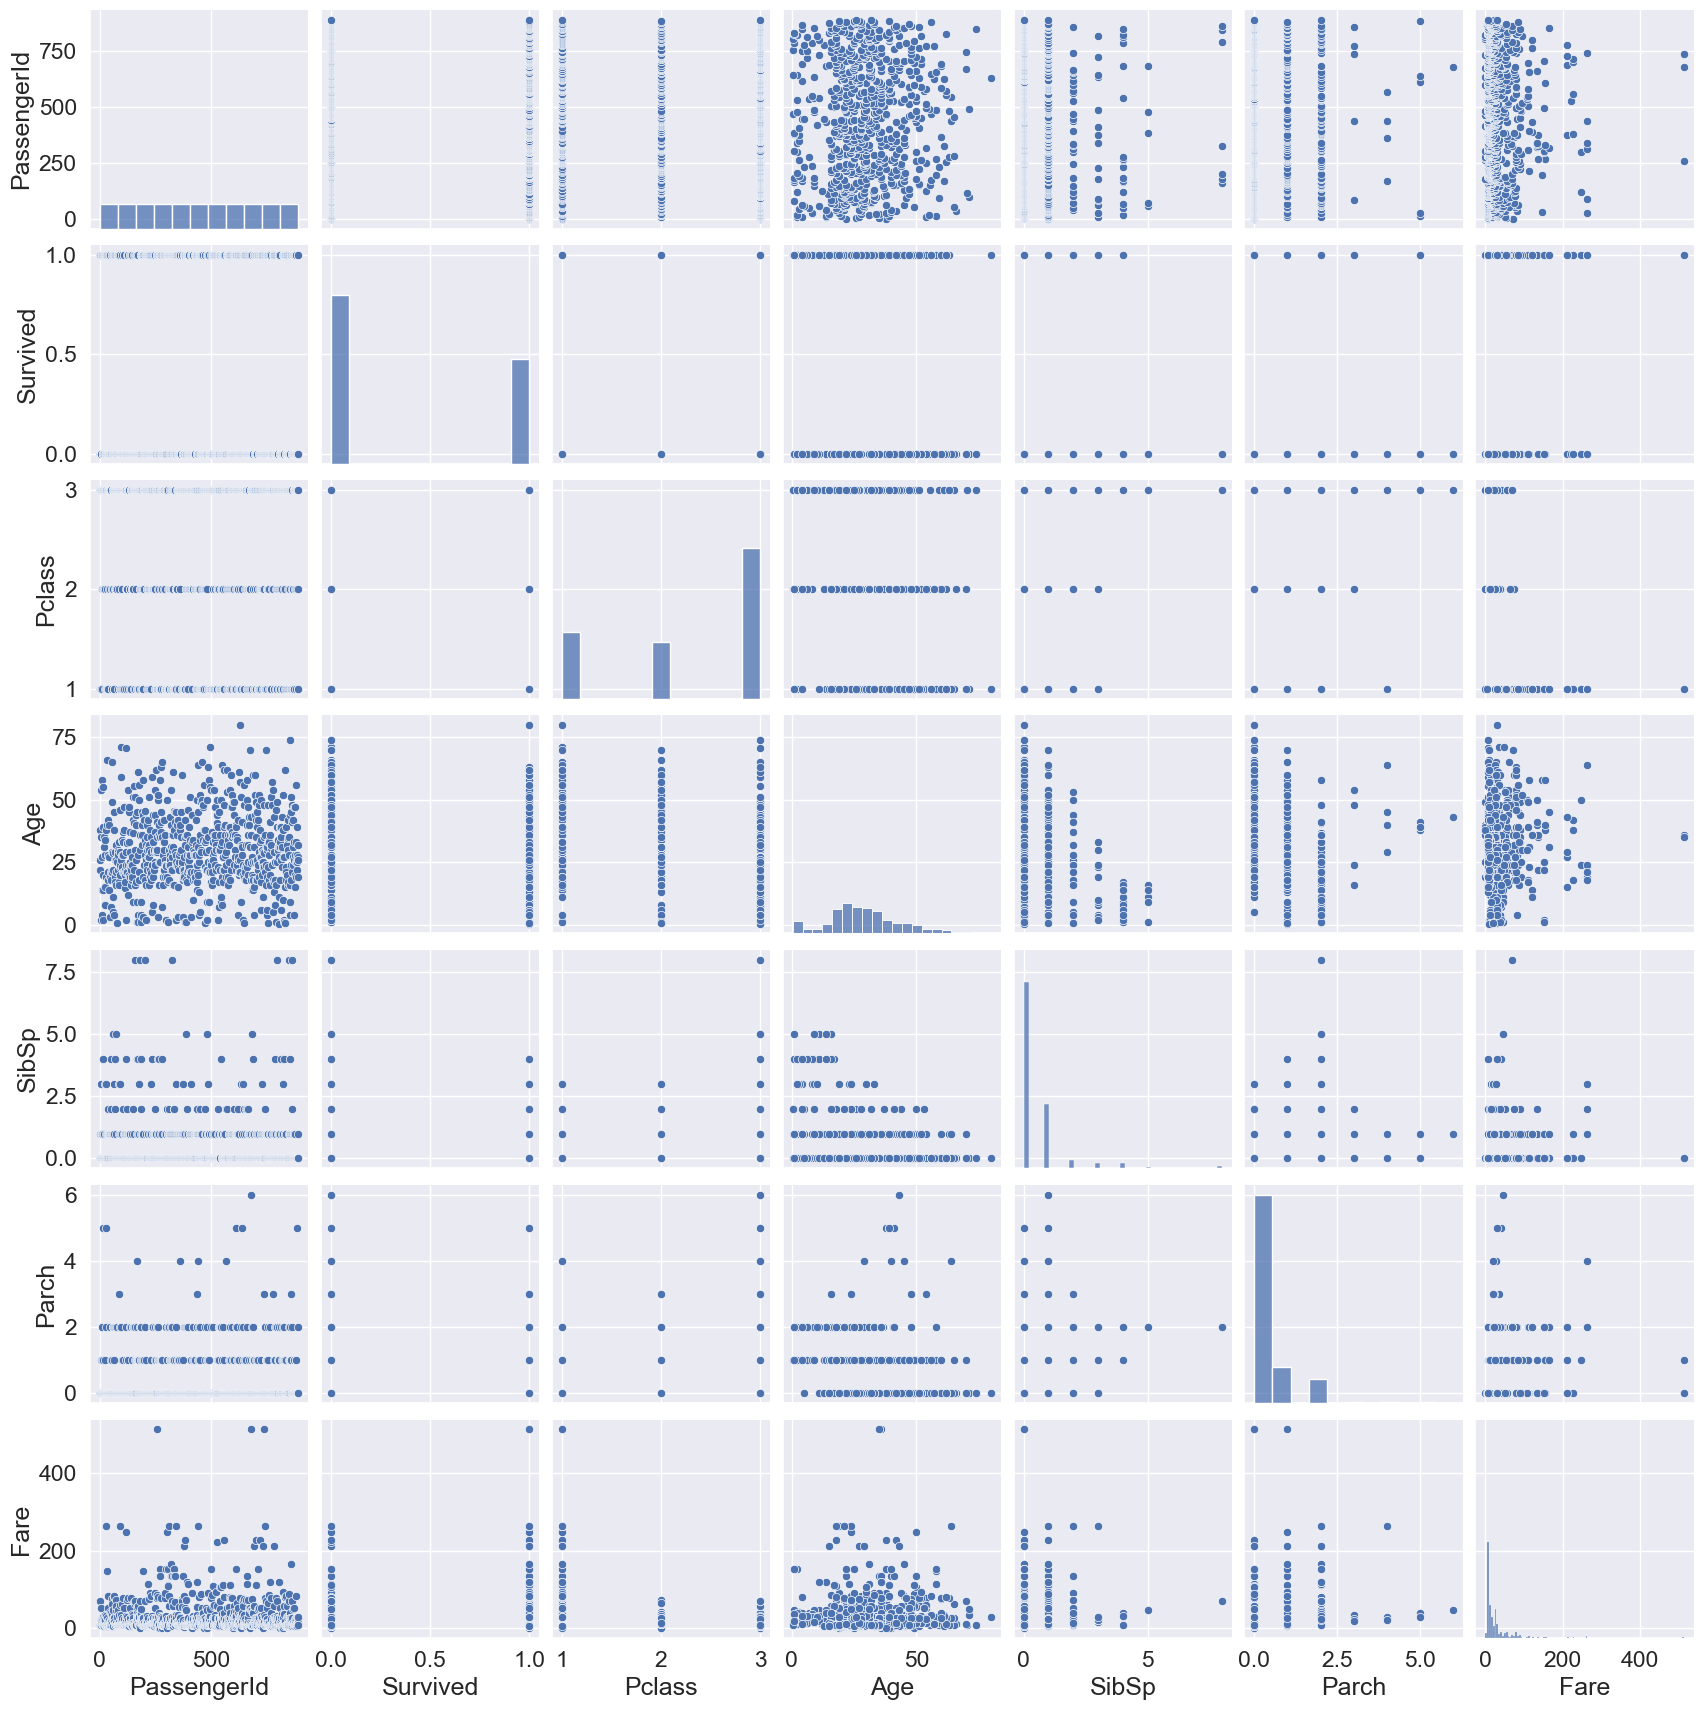

In [135]:
sns.set_theme(rc={'figure.figsize':(10,7)}, font_scale=1.5)
sns.pairplot(df, kind='scatter')

# 4 Выполнить обработку пропущенных значений

In [136]:
df.duplicated().sum()

0

In [137]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
df['Cabin'] = df['Cabin'].fillna("U")

print(df['Embarked'].value_counts())
df['Embarked'] = df['Embarked'].fillna("Unknown")
df['Age'] = df['Age'].fillna(df['Age'].mean())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [139]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 5 Произвести кодирование категориальных переменных

In [140]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
X_encoded = one_hot_encoder.fit_transform(X[categorical_cols])

X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, pd.DataFrame(X_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))], axis=1)
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,3,22.0,1,0,7.2500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1,35.0,1,0,53.1000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,3,35.0,0,0,8.0500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,888,1,19.0,0,0,30.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,889,3,NaN,1,2,23.4500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,890,1,26.0,0,0,30.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 6 Нормализовать числовые признаки

In [141]:
print(numeric_cols)
min_max_scaler = MinMaxScaler()
X[numeric_cols] = min_max_scaler.fit_transform(X[numeric_cols])

X = X.drop("PassengerId", axis=1)
X

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,1.0,NaN,0.125,0.333333,0.045771,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,0.0,0.321438,0.000,0.000000,0.058556,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 7 Построить и проанализировать матрицу корреляций

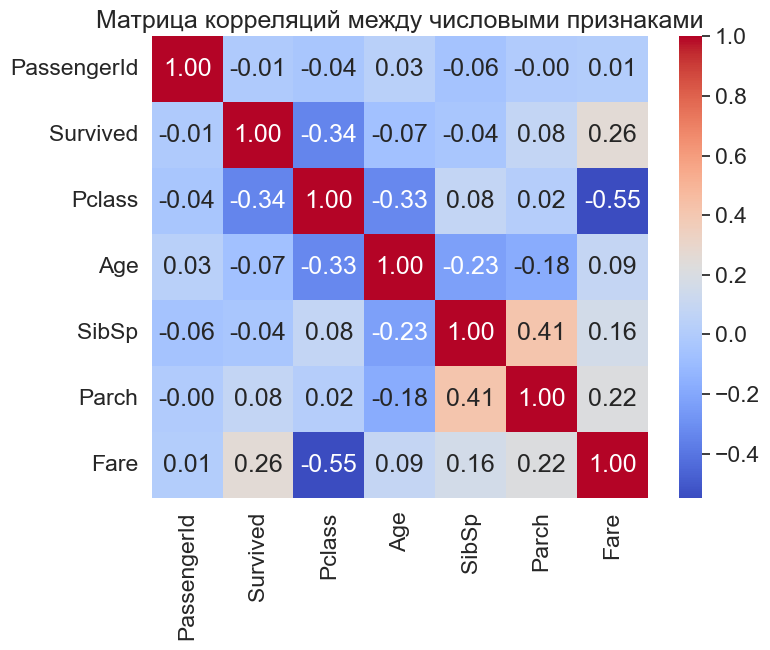

In [142]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt =".2f")
plt.title("Матрица корреляций между числовыми признаками")
plt.show()

In [143]:
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)

strong_pairs = corr_pairs[(corr_pairs < 1.0) & (abs(corr_pairs) > 0.7)]
strong_pairs
# Пар не нашлось :(

Series([], dtype: float64)

In [144]:
X_num = df[numeric_cols].select_dtypes(include='number')

vif = pd.DataFrame()
vif["Признак"] = X_num.columns
vif["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
print(vif)

       Признак       VIF
0  PassengerId  3.631509
1       Pclass  4.609606
2          Age  4.330747
3        SibSp  1.560612
4        Parch  1.549058
5         Fare  1.726585


# 8 Разделить данные на обучающую и тестовую выборки

<Axes: ylabel='Frequency'>

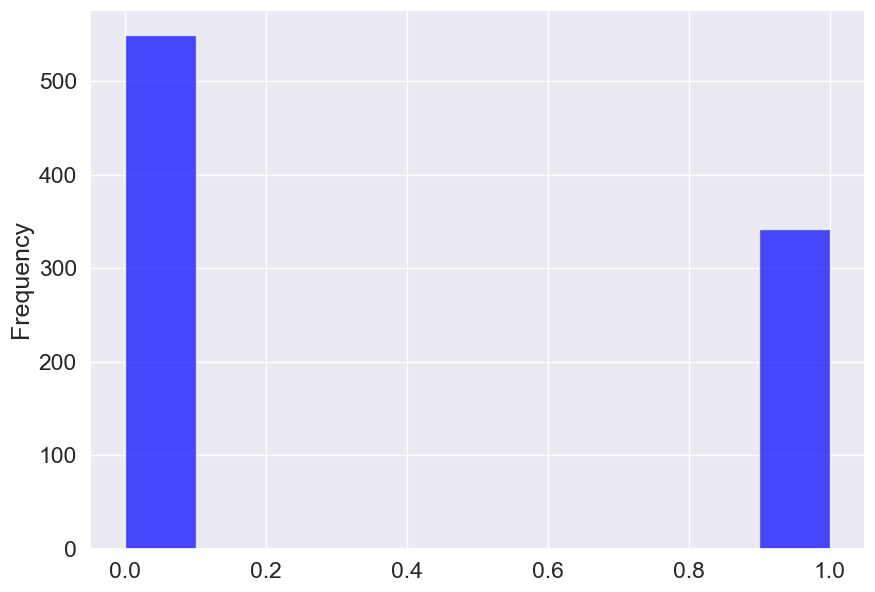

In [145]:
Y.plot(kind='hist', bins=10, alpha=0.7, color='blue', label='Train')

<Axes: ylabel='Frequency'>

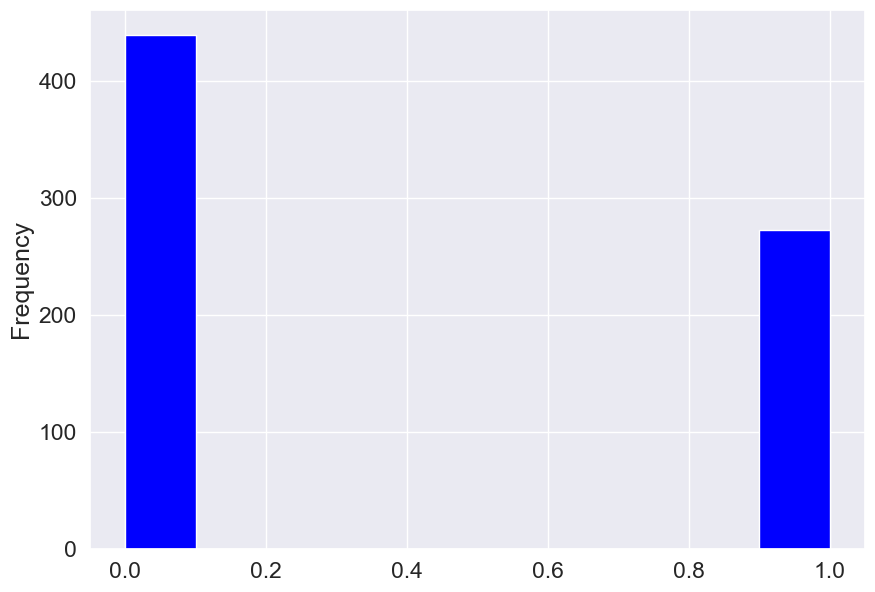

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=99, stratify=Y)

y_train.plot(kind='hist',  color='blue', label='Train')